# Problem 1 : Analysis of Numeric Variables

In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.
['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have? <br/>
b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative? <br/>
c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data. <br/>

Hints and Pointers

o In case of box-plot, outliers are the datapoints outside the whiskers, which are at Q1 – 1.5 IQR and Q3 + 1.5 IQR. <br/>
o Pandas has a bunch of statistical measures built in as methods/functions; .median() and .mean(), for example. <br/>
o Predicting one numeric variable with another numeric variable is easiest when they have a strong relationship. <br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset_house = pd.read_csv('./data/train.csv')
df_house = pd.DataFrame(dataset_house)
df_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
features_1 = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
df_1 = pd.DataFrame(dataset_house[features_1])
df_1.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have? <br/>

Answer: <code>LotArea</code> has the greatest number of outliers


[(0.0, 20000.0)]

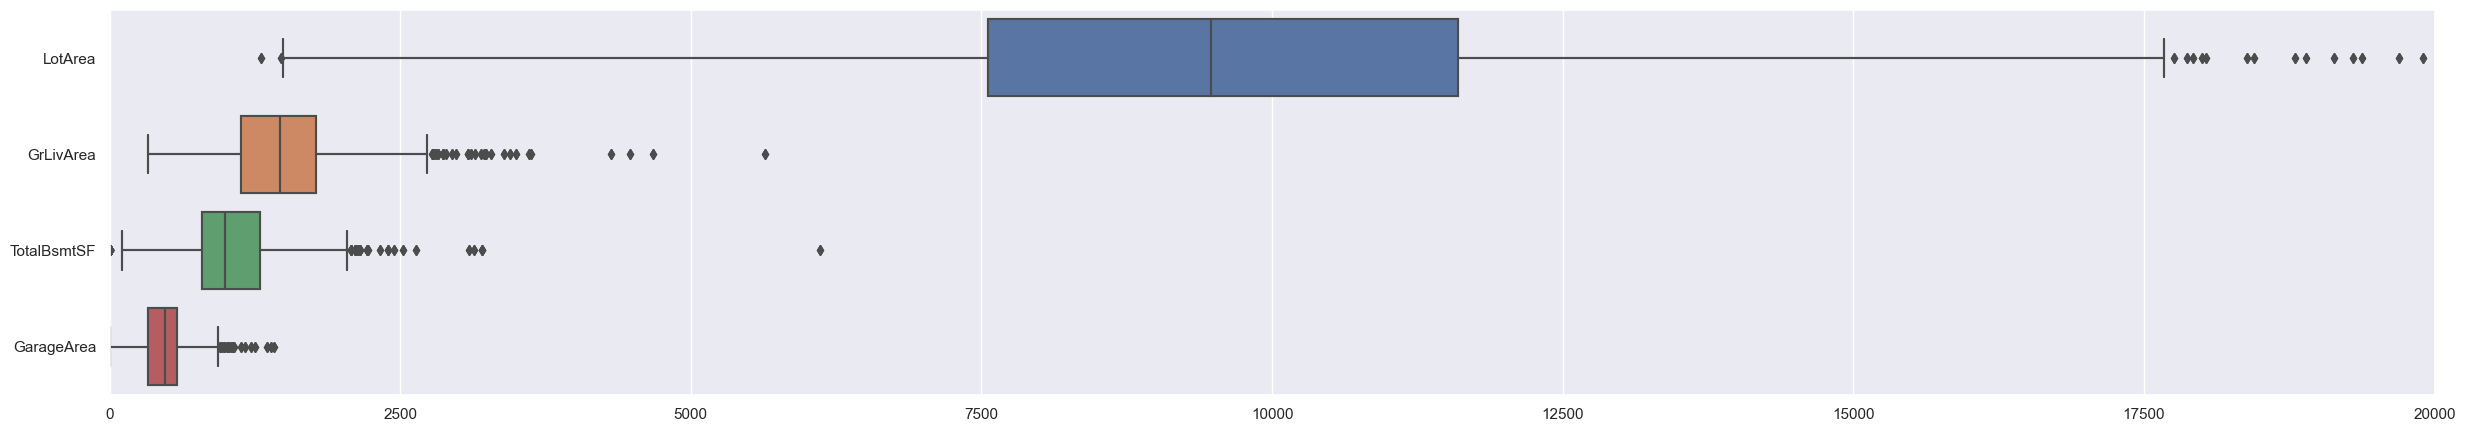

In [30]:
f = plt.figure(figsize=(30, 5))
sns.boxplot(data=df_1, orient="h")
# sns.boxplot(data=df_1, orient="h").set(xlim=(0, 20000))

In [21]:
q1 = df_1.quantile(0.25)
q3 = df_1.quantile(0.75)
iqr = q3 - q1
((df_1 < (q1 - 1.5 * iqr)) | (df_1 > (q3 + 1.5 * iqr))).sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative? <br/>
Answer: LotArea is the most skewed from a regular normal distribution, negatively skewed

In [43]:
df_1.skew(axis = 0, skipna = True)

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

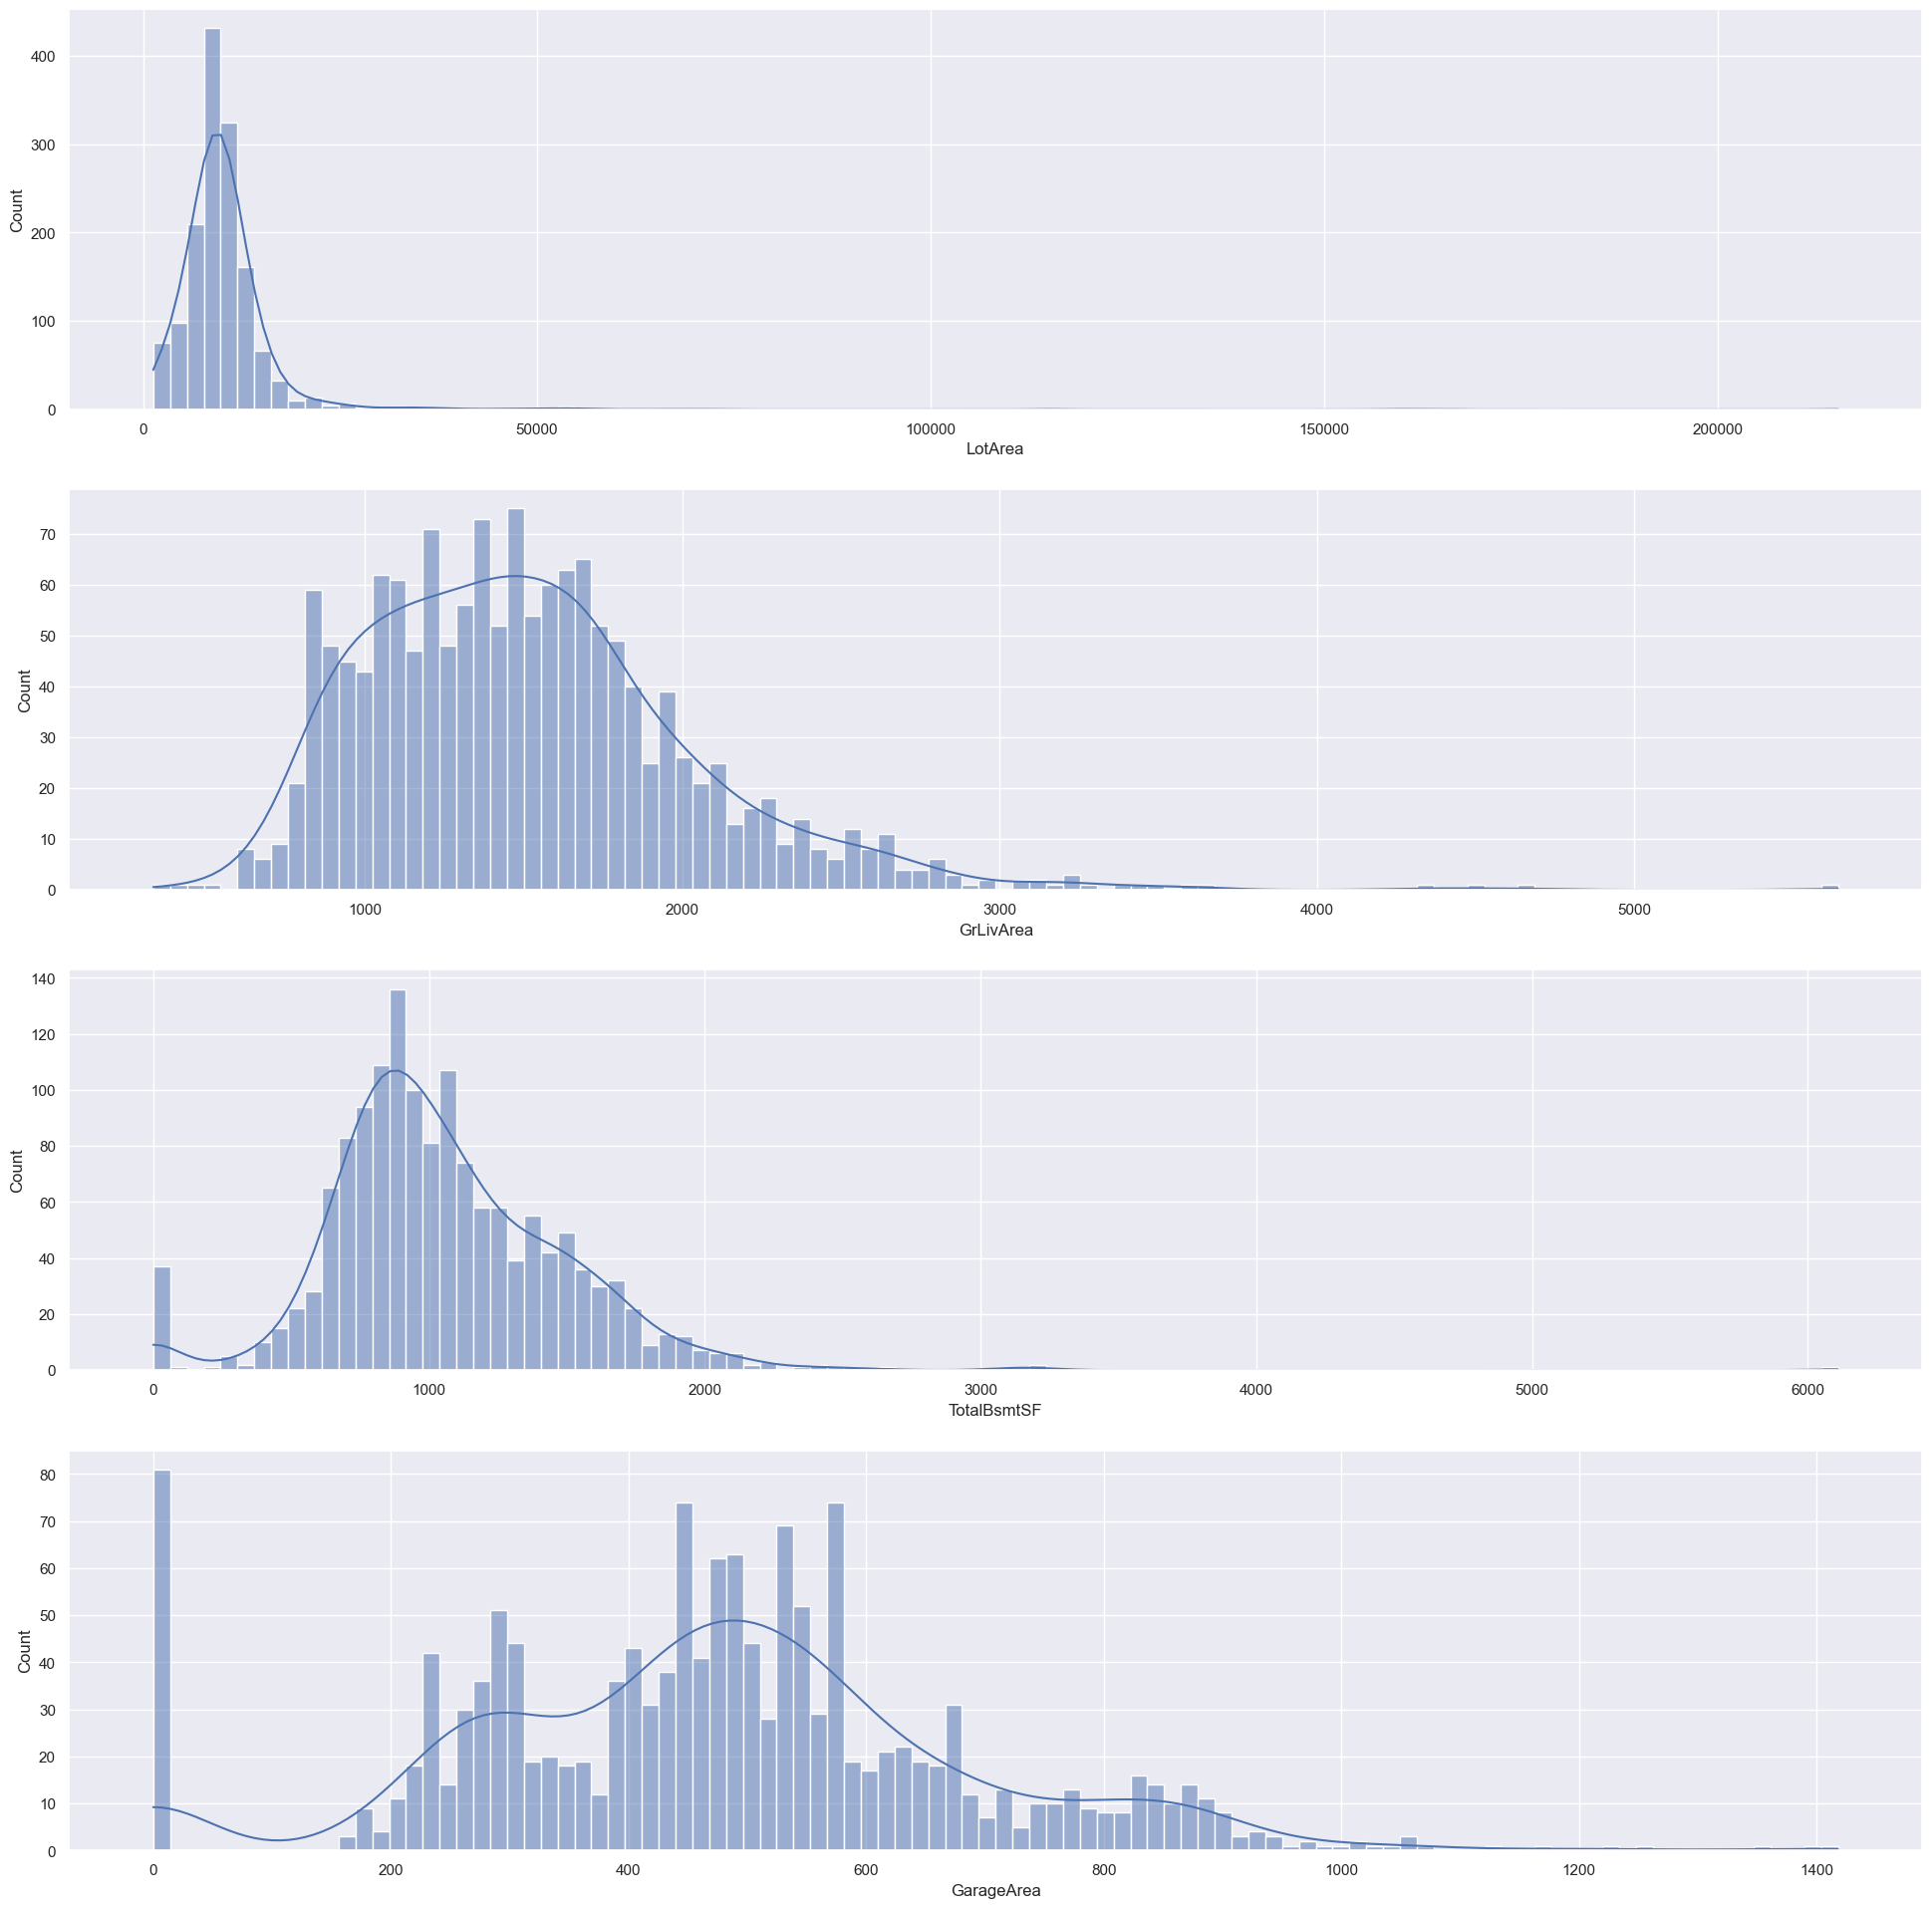

In [42]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
count = 0

for i in range(len(features_1)):
    sns.histplot(df_house[features_1[i]], kde=True, ax=axes[count], bins=100)
    count += 1

Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data. <br/>
Answer: <code>GrLivArea</code> and <code>GarageArea</code> since they produce a correlation of 0.708624 and 0.623431 respectively


,LotArea,GrLivArea,TotalBsmtSF,GarageArea
LotArea,1.000000,0.263116,0.260833,0.180403
GrLivArea,0.263116,1.000000,0.454868,0.468997
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665
GarageArea,0.180403,0.468997,0.486665,1.000000


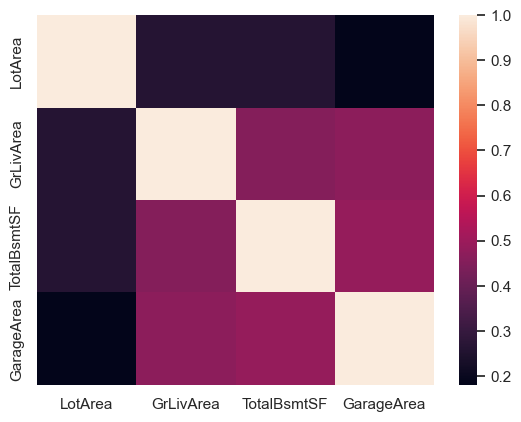

In [63]:
# def predict_saleprice(df, features):
#     for feature in features:
#         plot = sns.heatmap(data=df_house[features], x=df_house['SalePrice'], y=df_house[feature])
#     return plot

# sns.heatmap(df_1.corr())

# predict_saleprice(df_house, features)

# df_house[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea','SalePrice']].corr()

sns.heatmap(df_1.corr())
df_1.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


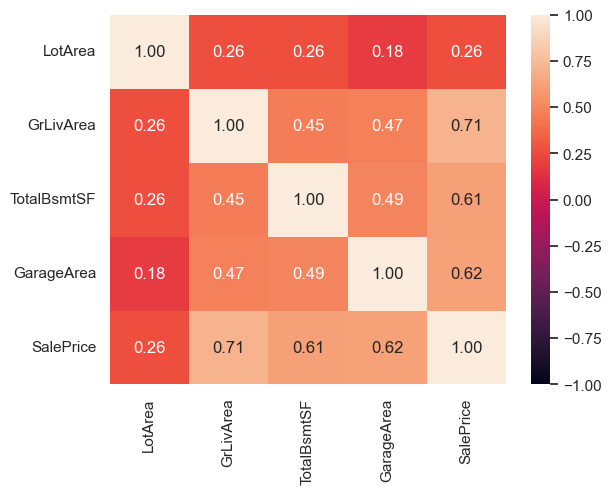

In [62]:
jointDF = pd.concat([df_1, df_house['SalePrice']], axis = 1).reindex(df_1.index)
sns.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF.corr()

# Problem 2 : Analysis of Categorical Variables

In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']


a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses? <br/>
b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data. <br/>


Hints and Pointers

o Levels for a categorical variable means the number of unique values. For example, gender has 3 levels, F, M, O. <br/>
o Each level of a categorical variable may contain a number of datapoints. For example, 14 M found in a dataset. <br/>
o When you want to find relationship between a numeric variable and a categorical one, you can’t do Correlation. <br/>
o Check box-plot function in seaborn carefully – there is a way to plot a numeric vs a categorical in the two axes. <br/> o Think: If there was a relationship between Salary and Gender, what would box-plot of Salary be across F, M, O? </br>


In [60]:
features_2 = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
df_2 = pd.DataFrame(dataset_house[features_2])
df_2

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


Which of these variables has the highest number of levels? Which of the levels has the highest number of houses? <br/>
Answer: <code>Neighborhood</code> has the highest number of levels , <code>NAmes</code> has the highest number of houses with 225

MSSubClass : 15
Neighborhood : 25
BldgType : 5
OverallQual : 10
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


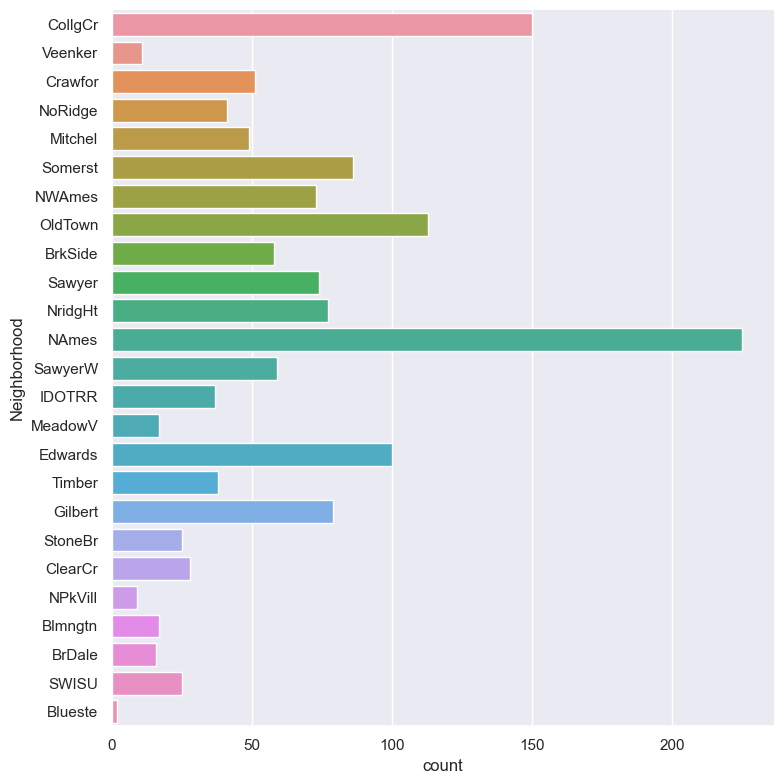

In [55]:
for i in features_2:
    unique_count = df_2[i].unique()
    print(i,':', len(unique_count))

print(df_2['Neighborhood'].value_counts())
sns.catplot(y = "Neighborhood", data = df_2, kind = "count", height = 8)


Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data. <br/>
Answer: <code>Neighborhood</code> and <code>OverQual</code> as there is lesser overlapping of box plots on the horizontal axis

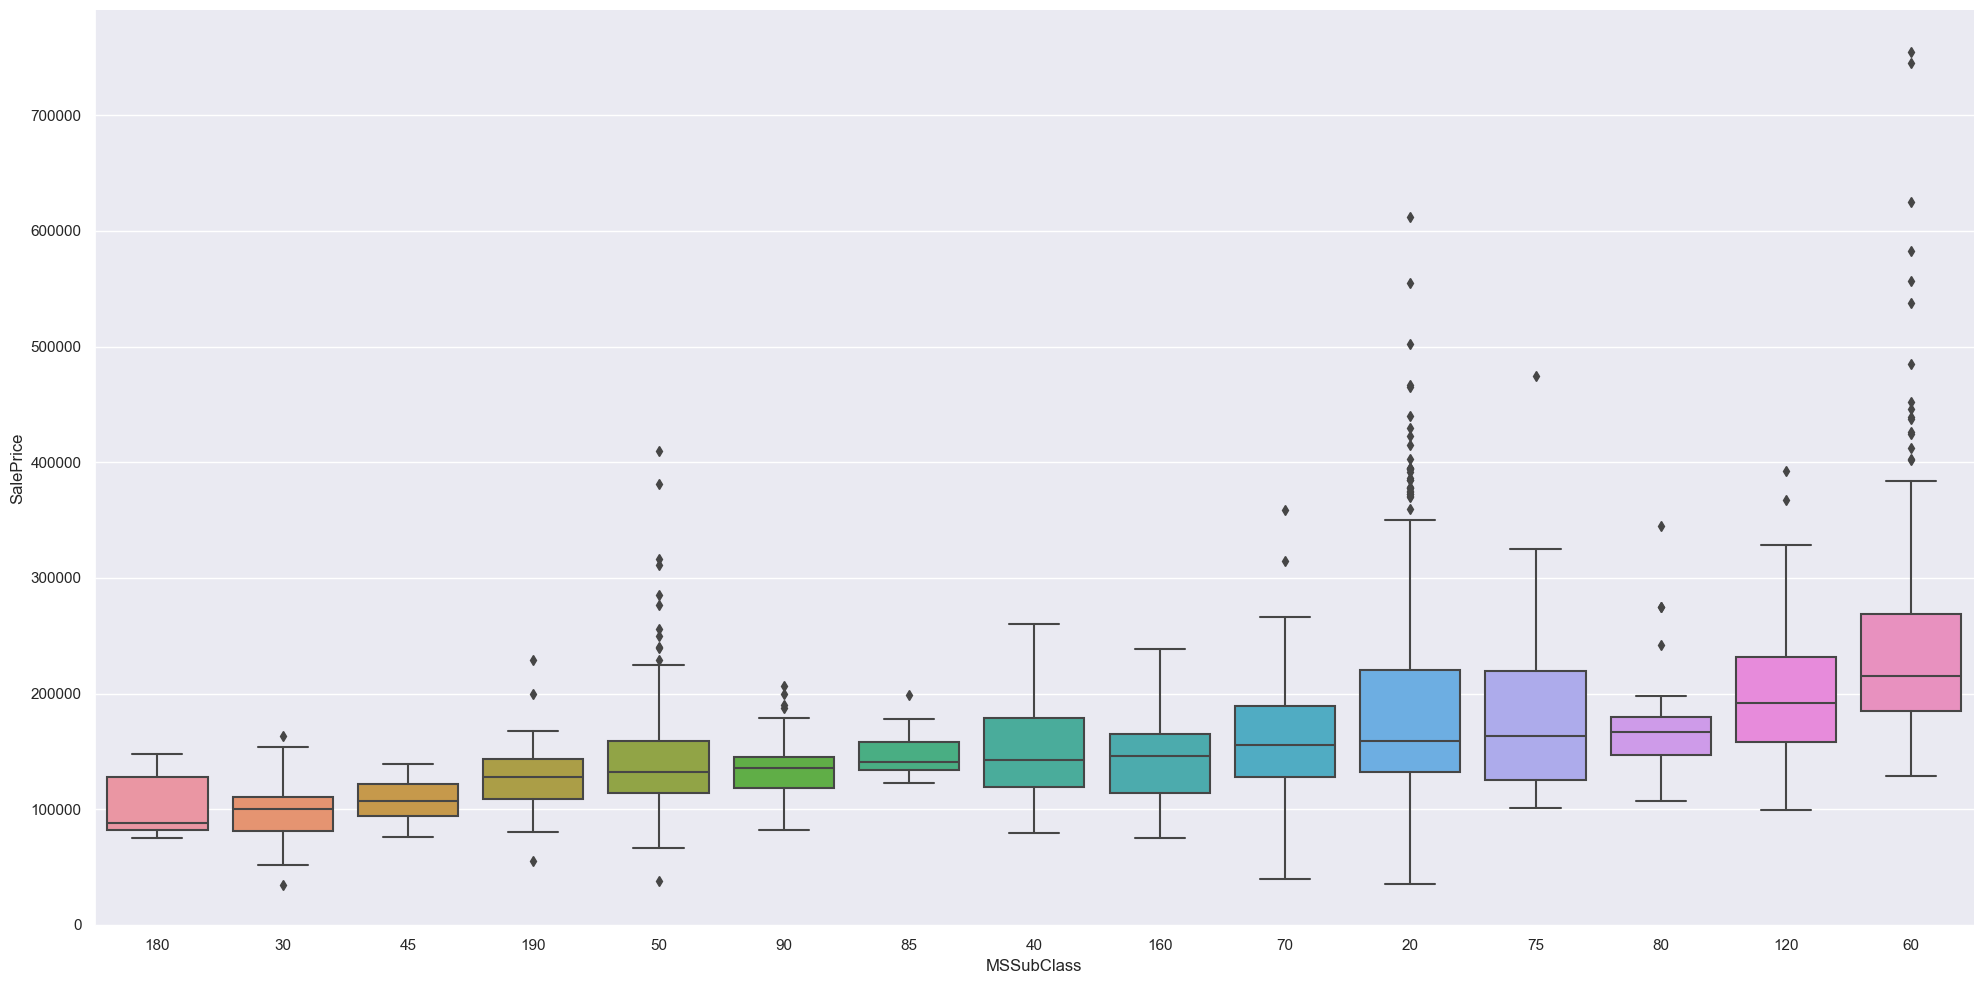

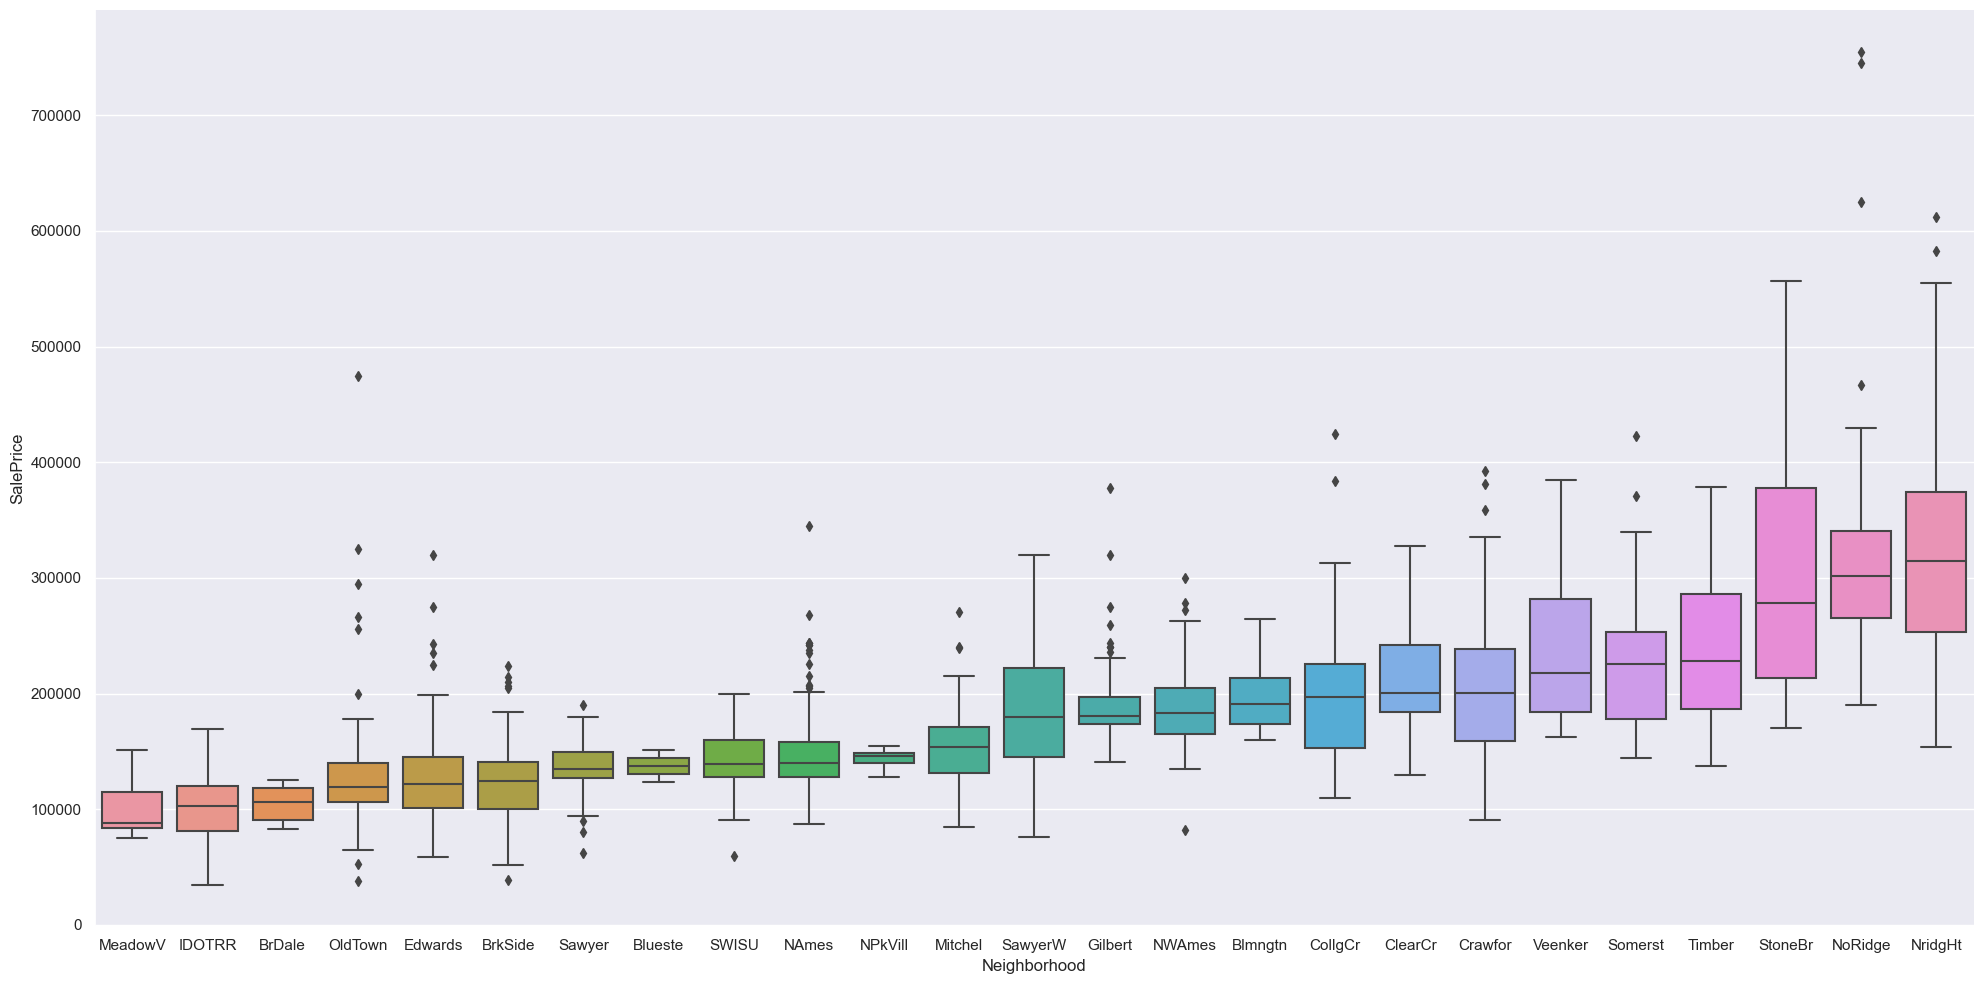

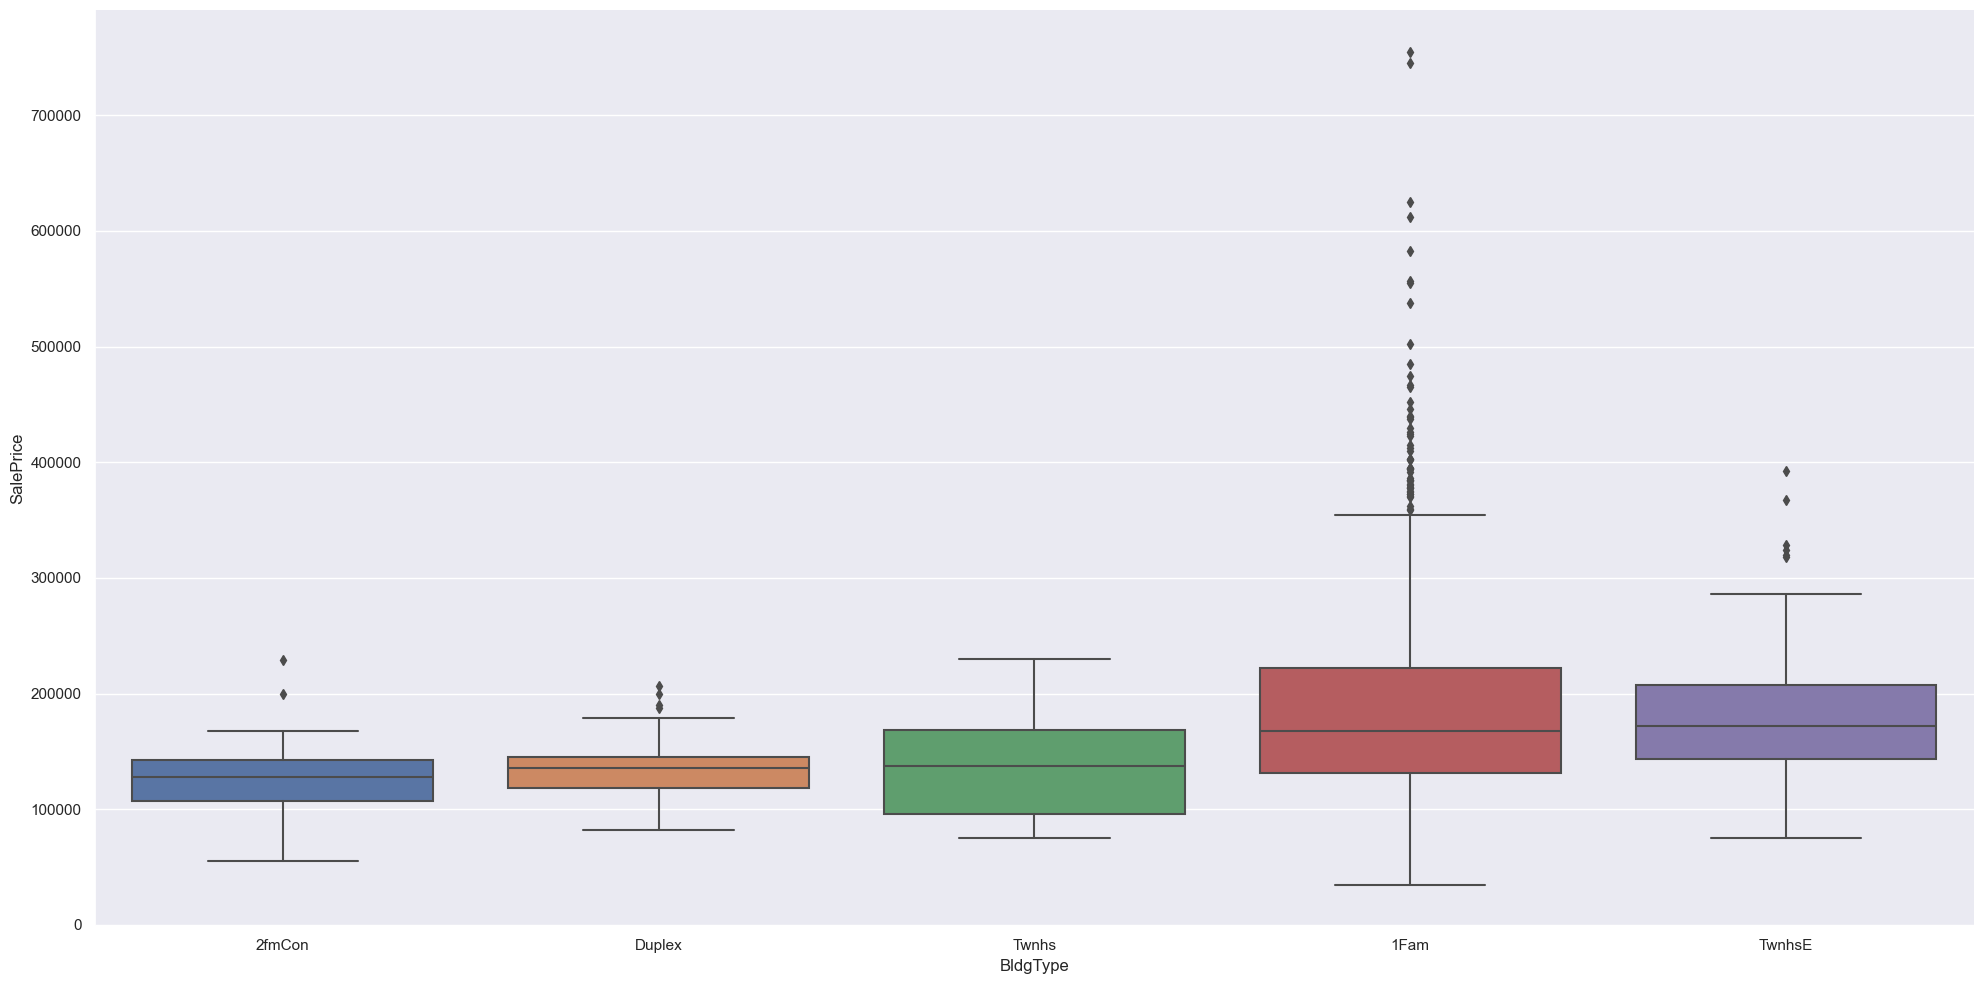

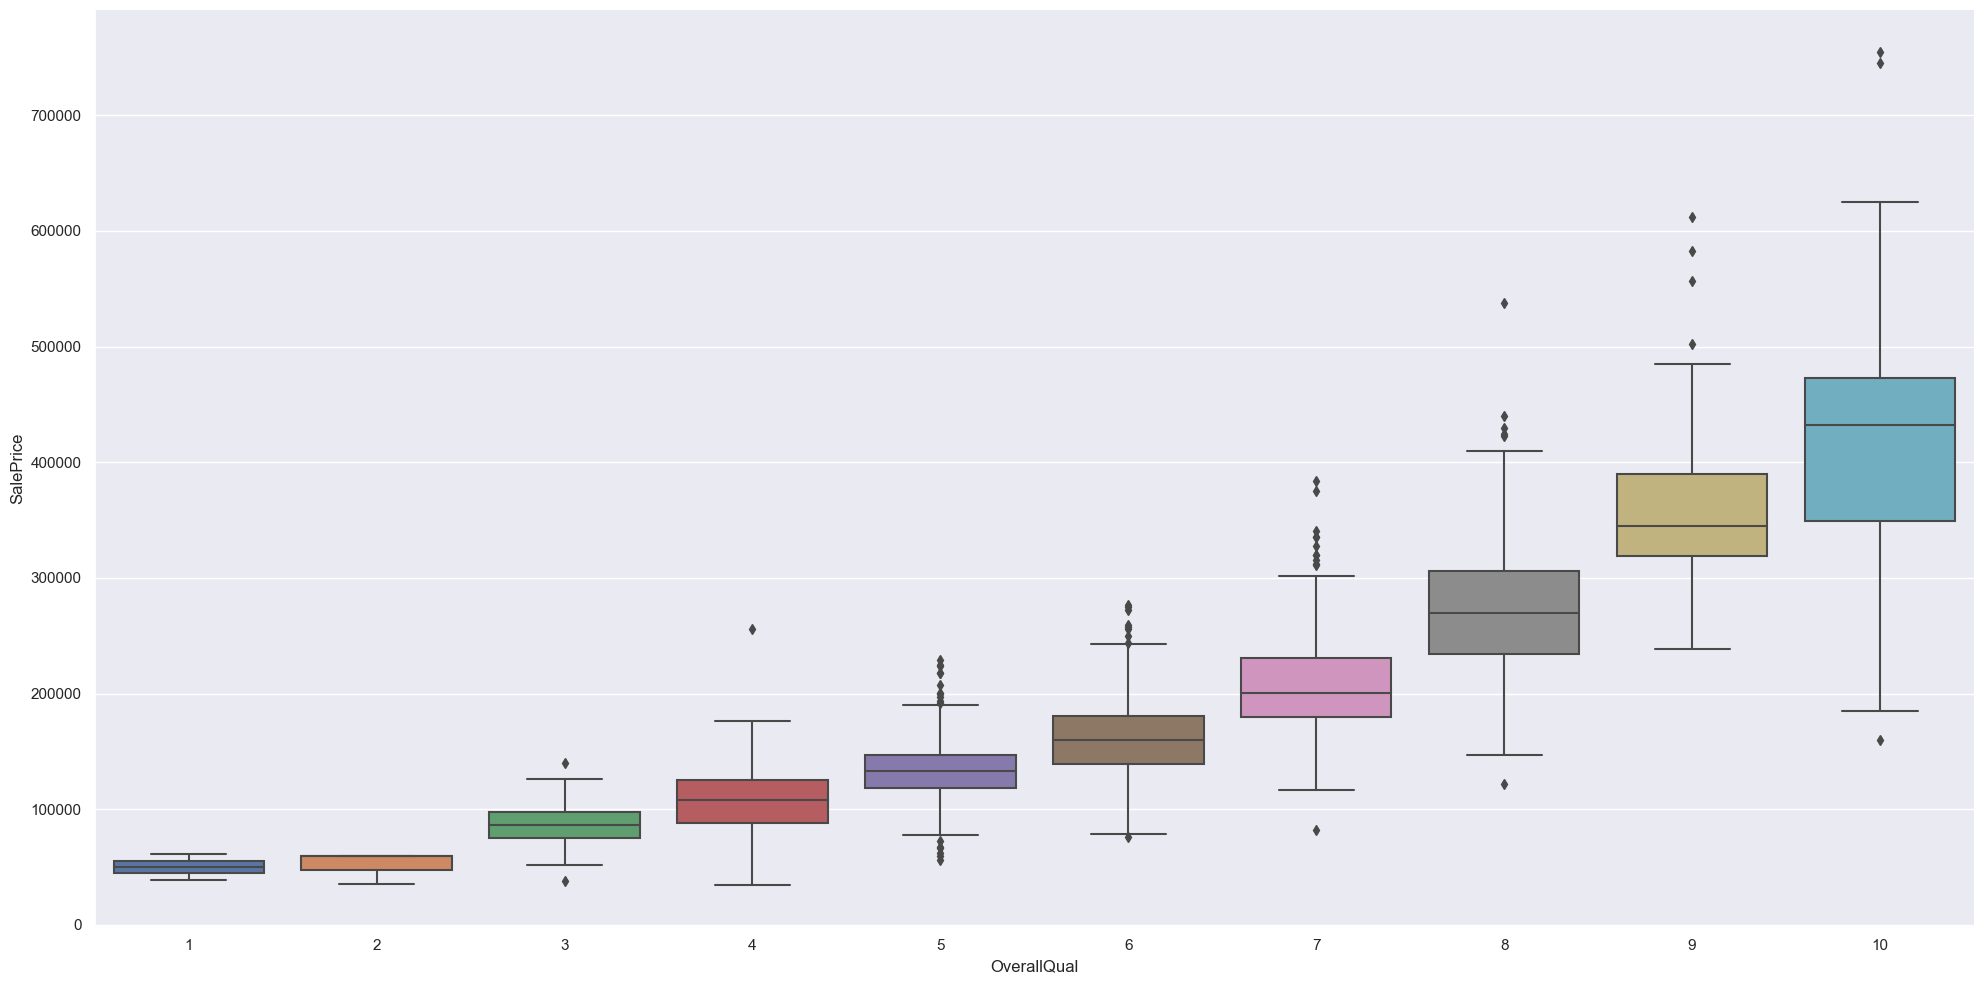

In [64]:
# sns.catplot(data=df_house, x='SalePrice', y="Neighborhood", kind="box", height = 10, aspect = 2)
# sns.catplot(data=df_house, x='SalePrice', y="BldgType", kind="box",  height = 10, aspect = 2)
jointDF = pd.concat([df_2, df_house['SalePrice']], axis = 1).reindex(df_2.index)

for var in jointDF:

    if var == 'SalePrice':
        continue

    order = jointDF.groupby(var)['SalePrice'].median().sort_values().index
    sns.catplot(x = var, y = 'SalePrice', data = jointDF, kind = 'box', height = 10, aspect = 2, order=order)

# Problem 3 : Interesting Questions for EDA

Choose any ONE of the following questions to answer. You may always try out the other one at home if you want.


a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA. <br/>
b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.


Hints and Pointers

o Check the data_description file very carefully and pick the variables you want to work with for these problems. <br/>
o In some cases, it is alright to create new variables out of the original ones, especially if they help you analyze. <br/>
o Do keep an eye out for missing values in the variables that you tackle and see what you can make out of those.


Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

Answer: Yes

            LotArea  1stFlrSF  2ndFlrSF  GrLivArea  SalePrice
LotArea    1.000000  0.475697  0.102069   0.365936   0.443469
1stFlrSF   0.475697  1.000000  0.027421   0.608191   0.579355
2ndFlrSF   0.102069  0.027421  1.000000   0.781945   0.447280
GrLivArea  0.365936  0.608191  0.781945   1.000000   0.683458
SalePrice  0.443469  0.579355  0.447280   0.683458   1.000000
            LotArea  1stFlrSF  2ndFlrSF  GrLivArea  SalePrice
LotArea    1.000000  0.291478  0.046253   0.257243   0.252921
1stFlrSF   0.291478  1.000000 -0.223710   0.554620   0.594935
2ndFlrSF   0.046253 -0.223710  1.000000   0.683441   0.313336
GrLivArea  0.257243  0.554620  0.683441   1.000000   0.708172
SalePrice  0.252921  0.594935  0.313336   0.708172   1.000000


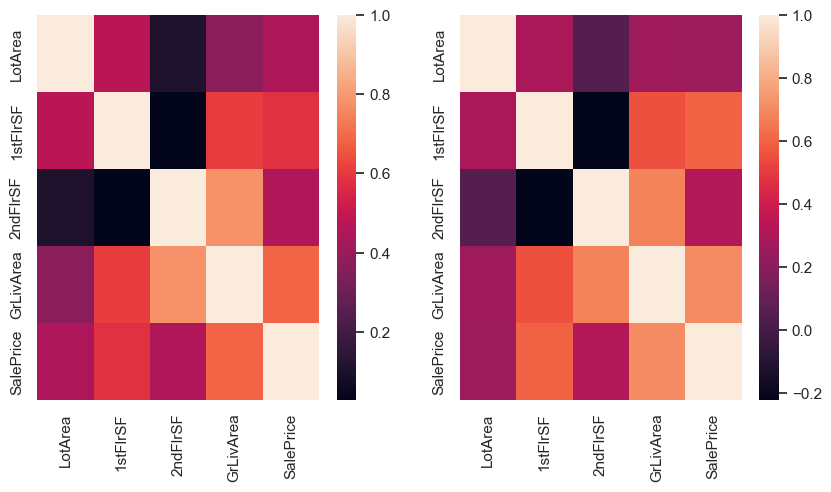

In [71]:
df_3 = df_house[['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'SalePrice', 'GarageType']]
no_garage = df_3[df_3['GarageType'].isnull()]
yes_garage = df_3[df_3['GarageType'].notnull()]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

corr_no = no_garage.corr()
sns.heatmap(corr_no,ax=ax1)

corr_yes = yes_garage.corr()
sns.heatmap(corr_yes, ax=ax2)

print(corr_no)
print(corr_yes)